# Hearthstone Data Exploration
This project explores and analyzes Hearthstone card data (from the wild format, in which players are allowed to play decks without the deck restrictions of Standard format, allowing the use of cards from any card set.) fetched via the Blizzard API. The data contains various properties like card cost (`manaCost`), rarity (`rarityId`), and class affiliation (`classId`). 
In this notebook, we'll investigate the distribution of these properties and uncover patterns in the dataset.

## Introduction
We begin by fetching Hearthstone card data from Blizzard's official API. This dataset is processed and analyzed to reveal insights into the game's card distribution by their properties.

In [217]:
import pandas as pd 
from api_fetch import fetch_hearthstone_data
import matplotlib.pyplot as plt
import seaborn as sns

fetched_cards = await fetch_hearthstone_data()

df = pd.read_json('hearthstone_all_cards.json')
print(df.shape)
print(df.columns)

Fetched 5805 cards in total from the API.
(5805, 33)
Index(['id', 'collectible', 'slug', 'classId', 'multiClassIds',
       'spellSchoolId', 'cardTypeId', 'cardSetId', 'rarityId', 'artistName',
       'manaCost', 'name', 'text', 'image', 'imageGold', 'flavorText',
       'cropImage', 'childIds', 'keywordIds', 'isZilliaxFunctionalModule',
       'isZilliaxCosmeticModule', 'health', 'attack', 'minionTypeId',
       'multiTypeIds', 'runeCost', 'armor', 'durability', 'parentId',
       'bannedFromSideboard', 'touristClassId', 'copyOfCardId',
       'maxSideboardCards'],
      dtype='object')


## 1. Mana Costs of Cards
In Hearthstone, mana is the resource used to play cards. Each turn, players gain one mana crystal, starting from 1 and increasing by 1 each turn, up to a maximum of 10 on turn 10. The mana cost of a card determines how much mana you need to play it.

### Why Mana Costs Matter
Mana costs add strategic depth to the game. Low-cost cards (e.g., 1-mana cards) are useful early on, enabling quick plays and early aggression. High-cost cards (e.g., 7 or 8-mana cards) tend to have stronger effects but are typically used later when players have more mana to spend.

### Maximum Mana Value
The maximum mana value a player can have is 10 mana crystals on turn 10. Some cards and effects can alter mana usage, providing additional strategic opportunities.

**In this section, we will visualize the distribution of mana costs to better understand the card's mana spread.**

In [205]:
for i in range(0,11):
    print("Number of card with the cost of " + str(i) + ": " + str(len(df[df['manaCost']== i])))

print("Number of card with the cost above 10: " + str(len(df[df['manaCost']> 10])))

Number of card with the cost of 0: 102
Number of card with the cost of 1: 770
Number of card with the cost of 2: 1105
Number of card with the cost of 3: 1182
Number of card with the cost of 4: 900
Number of card with the cost of 5: 629
Number of card with the cost of 6: 413
Number of card with the cost of 7: 293
Number of card with the cost of 8: 212
Number of card with the cost of 9: 106
Number of card with the cost of 10: 75
Number of card with the cost above 10: 18


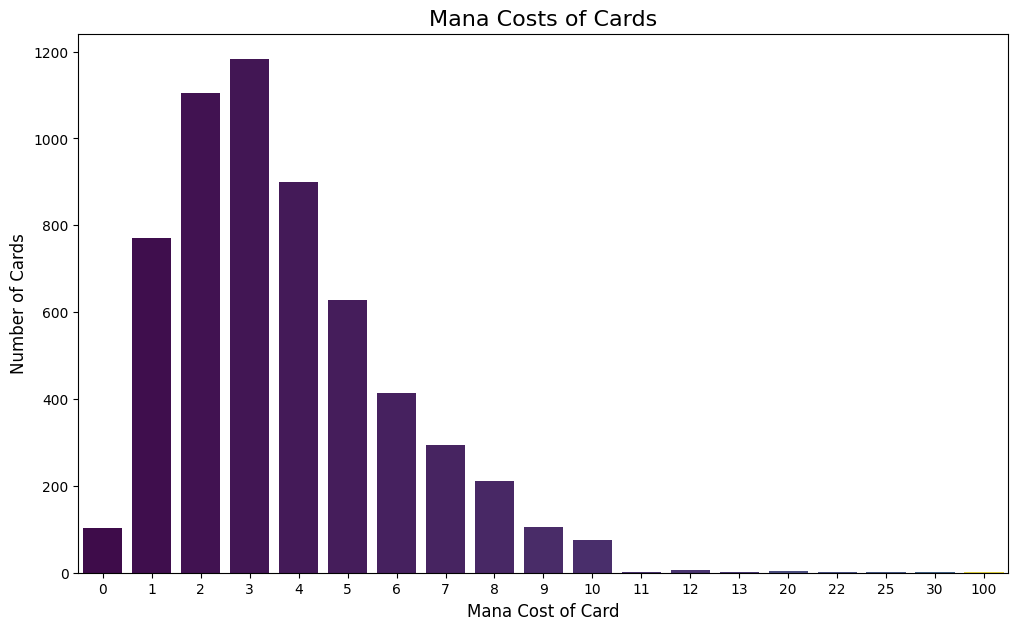

In [220]:
mana_costs = df['manaCost'].value_counts()

plt.figure(figsize=(12, 7))
sns.barplot(x=mana_costs.index, y=mana_costs.values, hue=mana_costs.index, palette='viridis', legend=False)

plt.title('Mana Costs of Cards', fontsize=16)
plt.xlabel('Mana Cost of Card', fontsize=12)
plt.ylabel('Number of Cards', fontsize=12)

plt.show()

## Conclusion: Mana Costs in Hearthstone Cards

The distribution of mana costs in Hearthstone cards reflects the game’s design, emphasizing a balance between early-game tempo and late-game strategy. As observed, the majority of cards have lower mana costs (ranging from 0 to 4), which aligns with the need for fast-paced and engaging early turns. This enables players to quickly establish a board presence, create synergies, and set up for later combos.

Cards with higher mana costs (from 5 to 10) are fewer in number, representing powerful spells and minions that can turn the tide of the game in the later stages. These cards often provide stronger effects but are harder to play, requiring careful planning and resource management.

The gradual increase in mana each turn—from 1 to 10—encourages strategic diversity and ensures that the game remains dynamic. Players are not limited to playing just one card per turn, which would lead to repetitive gameplay. Instead, the mana system fosters a deeper layer of strategy, where early plays interact with late-game cards to create **synergistic combos** and unexpected outcomes.

Overall, the distribution of mana costs helps maintain the **flow and excitement** of the game, offering players both immediate tactical options and long-term strategies. The balance between low-cost cards for quick plays and high-cost cards for impactful moments makes **Hearthstone** an engaging and dynamic experience.


## 2. Distribution of Card Classes

Hearthstone cards are categorized into different classes based on their design and gameplay mechanics. There are **10 distinct hero classes** in the game, each with unique cards and playstyles, plus **Neutral cards**, which can be used in any deck.

The `classId` column in the dataset represents these classes, and by analyzing its distribution, we can understand how many cards belong to each class and the overall card spread.

### The Classes and Neutral Cards

- **Class Cards**: Each hero class (like Druid, Warrior, Mage, etc.) has its own set of cards that synergize with the class's unique abilities. These cards often reflect the class's strengths and strategies. For example:
  - **Druid** cards focus on ramping mana and summoning creatures.
  - **Warrior** cards may focus on armor and weapon-based strategies.

- **Neutral Cards**: Neutral cards, identified by a `classId` of **12**, are not tied to any specific hero class and can be included in any deck. These cards are highly versatile and offer a wide variety of effects, making them essential in many decks.

### Analyzing the Data

To analyze the distribution of classes, we first identify the maximum value of `classId` in the dataset. By iterating through this range, we can count how many cards belong to each class. Neutral cards are also included, giving us a complete view of the card distribution.

**By analyzing this data, we gain insights into how different classes are represented in the dataset and which classes dominate or lack representation.**

In [224]:
max_class_id = df['classId'].max()
print('''The maximum value in the "classId" column is: ''' + str(max_class_id))

The maximum value in the "classId" column is: 14


Then, by using [Hearthstone's official card database](https://hearthstone.blizzard.com/en-us/cards), we need to manually check what each `classId` corresponds to. Based on the information gathered, the `classId` values correspond to the following Hearthstone classes:

- **1**: Death Knight
- **2**: Druid
- **3**: Hunter
- **4**: Mage
- **5**: Paladin
- **6**: Priest
- **7**: Rogue
- **8**: Shaman
- **9**: Warlock
- **10**: Warrior
- **12**: Neutral
- **14**: Demon Hunter

This allows us to map each card to its respective class, making the analysis more meaningful.

In [209]:
class_mapping = {
    1: "Death Knight",
    2: "Druid",
    3: "Hunter",
    4: "Mage",
    5: "Paladin",
    6: "Priest",
    7: "Rogue",
    8: "Shaman",
    9: "Warlock",
    10: "Warrior",
    12: "Neutral",
    14: "Demon Hunter"
}

df['className'] = df['classId'].map(class_mapping)

Now that we know each `classId` corresponds to a specific class, we can proceed to check how many cards each class has in the dataset. We can do this by filtering the DataFrame for each `classId` and counting the number of cards associated with each class.

In [210]:
for classes, count_class in class_counts.items():
    print(f"Number of {classes} Cards: {count_class}")

Number of Neutral Cards: 1724
Number of Priest Cards: 420
Number of Paladin Cards: 414
Number of Warlock Cards: 411
Number of Druid Cards: 407
Number of Warrior Cards: 406
Number of Hunter Cards: 405
Number of Mage Cards: 404
Number of Rogue Cards: 403
Number of Shaman Cards: 399
Number of Demon Hunter Cards: 247
Number of Death Knight Cards: 165


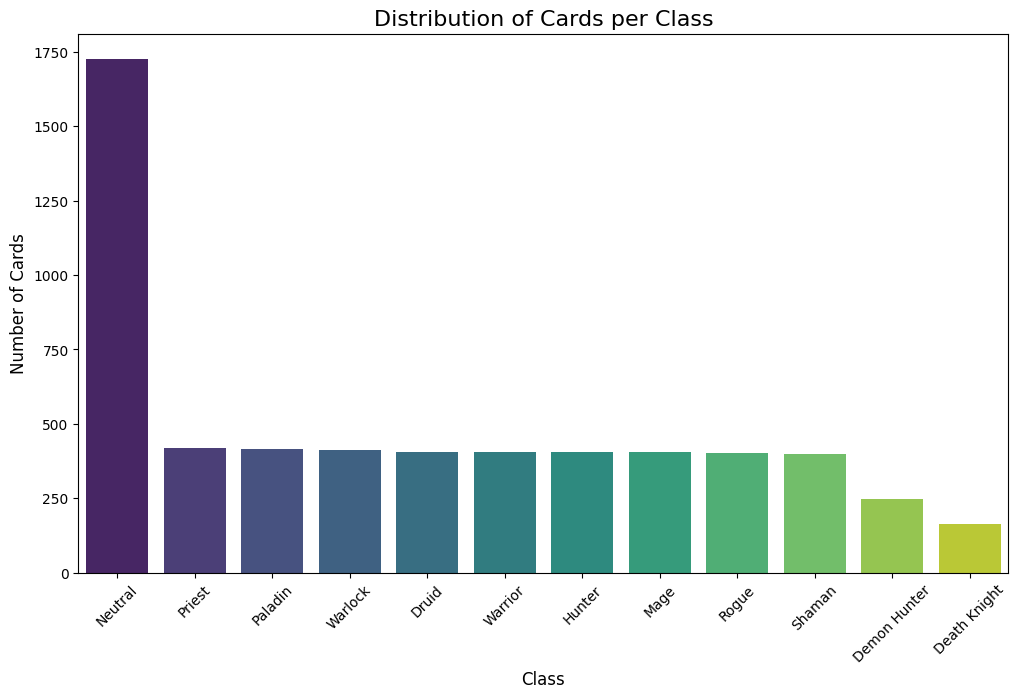

In [211]:
classes = df['className'].value_counts()

plt.figure(figsize=(12, 7))
sns.barplot(x=classes.index, y=classes.values, hue=classes.index, palette='viridis', legend=False)

plt.title('Distribution of Cards per Class', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Number of Cards', fontsize=12)

plt.xticks(rotation=45)

plt.show()

## Conclusion: Distribution of Class Cards in Hearthstone

The distribution of class cards in Hearthstone reveals a thoughtful design that ensures balanced gameplay. The relatively even spread of cards across the core classes (Priest, Paladin, Warlock, Druid, Warrior, Hunter, Mage, Rogue, and Shaman) ensures that each class has enough variety to develop unique strategies and synergies. These classes offer diverse playstyles that cater to different player preferences.

Neutral cards, with their versatility, play a crucial role in deck-building, providing options for all classes and enhancing the overall strategic depth of the game. The high number of neutral cards (1724) allows players to combine them with their class cards to create powerful and dynamic decks.

The lower card count for newer classes like Death Knight (introduced in **2023**) and Demon Hunter (introduced in **2020**) is expected, as both classes are still growing and evolving. As future expansions are released, their card pools will expand, bringing them closer to the established classes in terms of card variety.

Overall, the distribution of class and neutral cards helps maintain a balanced, diverse, and engaging meta, where players can experiment with different strategies and combinations for endless replayability.

## 3. Multi-Class Cards

There are cards that can be used by multiple classes at once, and this is indicated by the `multiClassIds` field. This field specifies which other classes the card can belong to (by stating multiple classId values), providing more flexibility in class identification. Cards that have `multiClassIds` listed can belong to several classes simultaneously, but each card will only have a primary classId representing its main class.

**We will analyze how many multi-class cards exist and visualize the distribution of multi-class cards across different classes.**

In [212]:
multi_classes = df['multiClassIds'].value_counts()

print(multi_classes)

multiClassIds
[]            5696
[2, 7, 8]        6
[3, 14]          5
[5, 10]          5
[2, 3]           5
[4, 7]           5
[4, 8]           5
[7, 10]          5
[6, 9]           5
[9, 14]          5
[2, 8]           5
[3, 5, 10]       5
[5, 6]           5
[2, 9]           4
[8, 10]          4
[10, 14]         4
[1, 5]           4
[3, 4]           4
[6, 7]           4
[4, 9]           4
[2, 6]           4
[1, 3]           4
[5, 8]           4
[4, 6, 9]        4
[7, 14]          4
Name: count, dtype: int64


In [213]:
def map_multi_classes(ids):
        return [class_mapping.get(i, f"Unknown ({i})") for i in ids]

# Apply the mapping function to create a new column
df['multiClassNames'] = df['multiClassIds'].apply(map_multi_classes)

multi_classes_names = df['multiClassNames'].value_counts()
print(multi_classes_names)

multiClassNames
[]                            5696
[Druid, Rogue, Shaman]           6
[Hunter, Demon Hunter]           5
[Paladin, Warrior]               5
[Druid, Hunter]                  5
[Mage, Rogue]                    5
[Mage, Shaman]                   5
[Rogue, Warrior]                 5
[Priest, Warlock]                5
[Warlock, Demon Hunter]          5
[Druid, Shaman]                  5
[Hunter, Paladin, Warrior]       5
[Paladin, Priest]                5
[Druid, Warlock]                 4
[Shaman, Warrior]                4
[Warrior, Demon Hunter]          4
[Death Knight, Paladin]          4
[Hunter, Mage]                   4
[Priest, Rogue]                  4
[Mage, Warlock]                  4
[Druid, Priest]                  4
[Death Knight, Hunter]           4
[Paladin, Shaman]                4
[Mage, Priest, Warlock]          4
[Rogue, Demon Hunter]            4
Name: count, dtype: int64


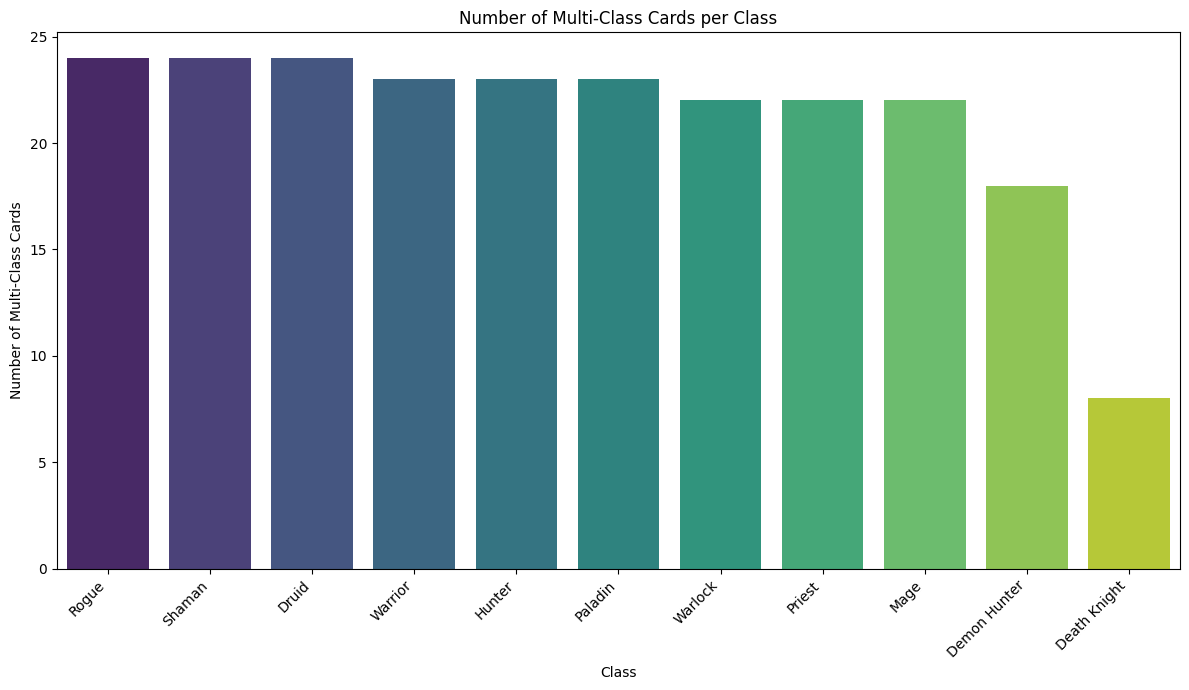

In [214]:
multi_class_count = pd.Series(
    [class_name for sublist in df['multiClassNames'] for class_name in sublist]
).value_counts()

multi_class_count_df = multi_class_count.reset_index()
multi_class_count_df.columns = ['Class', 'Number of Multi-Class Cards']

plt.figure(figsize=(12, 7))

sns.barplot(x='Class', y='Number of Multi-Class Cards', data=multi_class_count_df, hue='Class', palette='viridis')

plt.title('Number of Multi-Class Cards per Class')
plt.xlabel('Class')
plt.ylabel('Number of Multi-Class Cards')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Conclusion: Multi-Class Cards

The analysis of **multi-class cards** in Hearthstone reveals an interesting aspect of deck-building flexibility. Multi-class cards, indicated by the `multiClassIds` field, allow cards to be shared by multiple classes, giving players more strategic options. While these cards are relatively few in number, they serve an important role in enhancing synergy across classes without disrupting the core identity of each class.

Key findings include:

- **Limited Number of Multi-Class Cards**: Most multi-class combinations are rare, with 4 to 6 cards per combination. This careful balance ensures that multi-class cards offer diverse strategies without overwhelming the gameplay.
- **Core Classes Dominate**: Multi-class cards tend to feature combinations of the core classes (like Druid, Mage, and Warrior). This design preserves the distinctiveness of each class while introducing ways to blend their unique abilities.
- **Integration of Newer Classes**: Multi-class cards are particularly helpful for integrating newer classes like **Demon Hunter** and **Death Knight**, which have fewer cards in their primary class pools. By allowing these classes to borrow synergies from older classes, multi-class cards help ensure their viability in the meta.
- **Balanced Distribution**: The even spread of multi-class combinations suggests a thoughtful design aimed at providing strategic options without favoring any specific combination or class, ensuring a balanced and engaging experience for players.

Overall, multi-class cards contribute significantly to Hearthstone's depth and strategic variety, allowing players to explore new synergies while maintaining a balanced and diverse meta.

## 4. Analyzing Hearthstone Card Rarity

Card rarity in Hearthstone is categorized into five distinct levels. Each level has unique visual identifiers and drop rates. We manually mapped the `rarityId` based on information from [Hearthstone's official card database](https://hearthstone.blizzard.com/en-us/cards).

### Rarity Levels

1. **Common** (Rarity ID: `1`)
   - **Description**: Common cards are the second-lowest level of rarity, above Free but below Rare, Epic, and Legendary.
   - **Visual Indicators**: 
     - White gem at the bottom-center of the card art.
     - No special glow when opening packs.

2. **Free** (Rarity ID: `2`)
   - **Description**: Free cards represent the lowest rarity level and are primarily obtained after completing the New Player Rank system.
   - **Visual Indicators**:
     - No gem at the bottom-center of the card art.

3. **Rare** (Rarity ID: `3`)
   - **Description**: Rare cards are one level above Common but below Epic and Legendary.
   - **Visual Indicators**: 
     - Blue gem at the bottom-center of the card art.
     - Blue glow when opening packs.

4. **Epic** (Rarity ID: `4`)
   - **Description**: Epic cards are the second-highest level of rarity.
   - **Visual Indicators**: 
     - Purple gem at the bottom-center of the card art.
     - Pink glow when opening packs.

5. **Legendary** (Rarity ID: `5`)
   - **Description**: Legendary cards are the highest rarity and feature unique visual elements.
   - **Visual Indicators**:
     - Orange gem at the bottom-center of the card art.
     - Orange glow when opening packs.
     - A dragon crest around the portrait.

---

### Summary Table of Rarities

| Rarity ID | Name       | Visual Indicator                     | Glow Color | Notes                      |
|-----------|------------|--------------------------------------|------------|----------------------------|
| 1         | Common     | White gem                           | None       | Most frequently obtained.  |
| 2         | Free       | None                                | None       | Obtained in new player ranks. |
| 3         | Rare       | Blue gem                            | Blue       | Moderate rarity.           |
| 4         | Epic       | Purple gem                          | Pink       | Second-highest rarity.     |
| 5         | Legendary  | Orange gem, dragon crest            | Orange     | Most difficult to obtain.  | 

---

### Examples of Hearthstone Card Rarities

Below are visual examples of five Hearthstone card rarities: **Common**, **Free**, **Rare**, **Epic**, and **Legendary**:

<div style="display: flex; justify-content: space-evenly; align-items: center; margin-top: 10px; margin-bottom: 20px;">
  <figure style="text-align: center;">
    <img src="https://d15f34w2p8l1cc.cloudfront.net/hearthstone/a7b84539fb47a32a7867bd748a652ed85a2256ed3e1dc2085e3ba037f9ce941e.png" alt="Common Card" width="130">
  </figure>
  <figure style="text-align: center;">
    <img src="https://d15f34w2p8l1cc.cloudfront.net/hearthstone/d69f4f7c568dd1a4fcc85efd63213be370a4f9f145eb00d7dc64f455c4c19133.png" alt="Free Card" width="130">
  </figure>
  <figure style="text-align: center;">
    <img src="https://d15f34w2p8l1cc.cloudfront.net/hearthstone/c0a6172d08cfc2382f882adb3dd17ff41e32d72dc238cd4fc05d31c1bb525ce4.png" alt="Rare Card" width="130">
  </figure>
  <figure style="text-align: center;">
    <img src="https://d15f34w2p8l1cc.cloudfront.net/hearthstone/97eb9f15bded0b8710f9d5dec065cc5b7573238b1f08fe868dfeb03350fa8562.png" alt="Epic Card" width="130">
  </figure>
  <figure style="text-align: center;">
    <img src="https://d15f34w2p8l1cc.cloudfront.net/hearthstone/813f4096a4415932d746f4367726e28dffb25ff251c6481978d60a8cc995d228.png" alt="Legendary Card" width="130">
  </figure>
</div>

**In this section, we will analyze the rarity distribution.**

In [ ]:
rarity_mapping = {
    1: "Common",
    2: "Free",
    3: "Rare",
    4: "Epic",
    5: "Legendary"
}

df['rarityId'] = df['rarityId'].map(rarity_mapping)

rarity_counts = df['rarityId'].value_counts()

for rarity, count_rarity in rarity_counts.items():
    print(f"Number of {rarity} Cards: {count_rarity}")

Number of Common Cards: 2127
Number of Rare Cards: 1565
Number of Epic Cards: 927
Number of Legendary Cards: 914
Number of Free Cards: 272


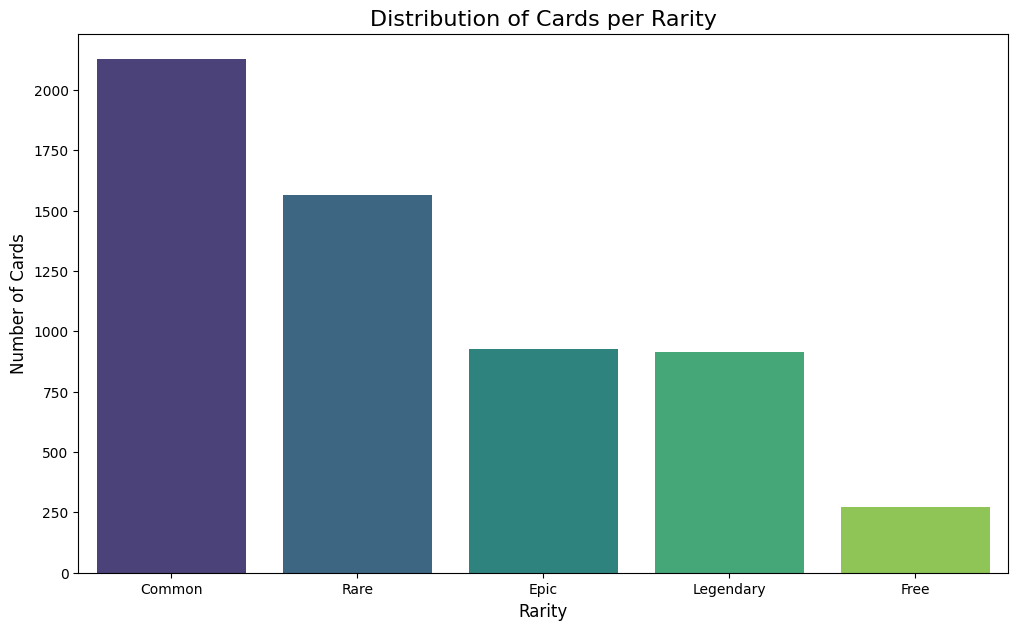

In [216]:
rarities = df['rarityId'].value_counts()

plt.figure(figsize=(12, 7))
sns.barplot(x=rarities.index, y=rarities.values, hue=rarities.index, palette='viridis', legend=False)

plt.title('Distribution of Cards per Rarity', fontsize=16)
plt.xlabel('Rarity', fontsize=12)
plt.ylabel('Number of Cards', fontsize=12)

plt.show()